In [ ]:
import matplotlib.pyplot as plt
from qiskit.circuit.library import HGate, MCXGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# 读取数据
file_path = r'D:\大论文matlab\马2.0\NQPC.txt'
processed_lines = []
with open(file_path, 'r') as file:
    for line in file:
        processed_lines.append(line.strip())

# 创建量子寄存器
q_X = QuantumRegister(7, name='X')
q_Y = QuantumRegister(8, name='Y')
q_Z = QuantumRegister(8, name='Z')
q_F = QuantumRegister(1, name='F')

c_X = ClassicalRegister(7)
c_Y = ClassicalRegister(8)
c_Z = ClassicalRegister(8)
c_F = ClassicalRegister(1)

circuit = QuantumCircuit(q_X, q_Y, q_Z, q_F, c_X, c_Y, c_Z, c_F)

# 添加 H 门
for h in range(23):
    circuit.append(HGate(), [h])
circuit.barrier()

# **封装 33,025 个 MCXGate 为子电路**
def create_mcx_subcircuit(processed_lines):
    sub_qr = QuantumRegister(24, name="sub_q")  # 23 控制位 + 1 目标位
    sub_circuit = QuantumCircuit(sub_qr, name="  Horse-FQPC  ")

    for i in range(33025):
        gate = MCXGate(23, ctrl_state=processed_lines[i])
        sub_circuit.append(gate, sub_qr[:24])  # 24 个量子位

    return sub_circuit.to_gate()

# 添加封装好的门
mcx_gate = create_mcx_subcircuit(processed_lines)
circuit.append(mcx_gate, range(24))
circuit.barrier()
circuit.x(q_X[6])
circuit.x(q_Y[7])
circuit.x(q_Z[7])
circuit.barrier()
gate = MCXGate(6,ctrl_state='000000')
circuit.append(gate, [0,1,2,3,4,5,6])
gate1 = MCXGate(7,ctrl_state='0000000')
circuit.append(gate1, [7,8,9,10,11,12,13,14])
gate2 = MCXGate(7,ctrl_state='0000000')
circuit.append(gate2, [15,16,17,18,19,20,21,22])
# 绘制电路
circuit.barrier()
circuit.measure(q_F,c_F)
circuit.measure(q_X,c_X)
circuit.measure(q_Y,c_Y)
circuit.measure(q_Z,c_Z)
circuit.draw(output='mpl', reverse_bits=True, scale=0.8, fold=200).savefig(
    "Horse镜像.png", format="png", dpi=200, bbox_inches='tight'
)
#fig = circuit.draw(output='mpl', reverse_bits=True, scale=1, fold=100)
#
#fig.savefig("Hourse镜像.png",format="png",dpi=600)

In [ ]:
print(circuit.depth())
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100).savefig('x镜像.png')

In [ ]:
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
#####寄存


q_Y = QuantumRegister(8, name='Y')
q_Z = QuantumRegister(8, name='Z')
q_F = QuantumRegister(1, name='F')


#circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F)# ,q_B,c_B
circuit = QuantumCircuit(q_Y)
circuit.x(q_Y[7])
gate = MCXGate(7,ctrl_state='0000000')
circuit.append(gate, [0,1,2,3,4,5,6,7])
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)

In [ ]:
print(circuit.depth())
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100).savefig('y镜像.png')

In [ ]:
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
#####寄存



q_Z = QuantumRegister(8, name='Z')



#circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F)# ,q_B,c_B
circuit = QuantumCircuit(q_Z)
circuit.x(q_Z[7])
gate = MCXGate(7,ctrl_state='0000000')
circuit.append(gate, [0,1,2,3,4,5,6,7])
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)

In [ ]:
print(circuit.depth())
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100).savefig('Z镜像.png')

In [ ]:
#RGB交换
#空间镜像
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
#####寄存

q_X = QuantumRegister(8, name='R')
q_Y = QuantumRegister(8, name='G')
q_Z = QuantumRegister(8, name='B')
q_F = QuantumRegister(1, name='F')

c_Y = ClassicalRegister(8)
c_Z = ClassicalRegister(8)
c_F = ClassicalRegister(1)

#circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F)# ,q_B,c_B
circuit = QuantumCircuit(q_X,q_Y,q_Z)
circuit.swap(q_Z,q_X)

circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)

print(circuit.depth())

In [ ]:
print(circuit.depth())
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100).savefig('RB交换.png')

In [ ]:
#比较器测试
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

#####寄存


q_F = QuantumRegister(1, name='F')
q_R = QuantumRegister(8, name='R')
q_K = QuantumRegister(8, name='k')
q_X = QuantumRegister(3, name='X')
c_R = ClassicalRegister(8)
c_K = ClassicalRegister(8)
c_F = ClassicalRegister(1)
c_X = ClassicalRegister(3)
#circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F)# ,q_B,c_B
circuit = QuantumCircuit(q_F,q_R,q_K,c_K,c_R,)


def create_mcx_subcircuit():
    sub_qr = QuantumRegister(9, name="sub_q")  # 23 控制位 + 1 目标位
    sub_circuit = QuantumCircuit(sub_qr, name="  Dog-FQPC ∣F⟩&∣R⟩  ")

    return sub_circuit.to_gate()

# 添加封装好的门
mcx_gate = create_mcx_subcircuit()
circuit.append(mcx_gate, range(9))
circuit.barrier()

comp = IntegerComparator(8, 1, geq=True, name='Comparator')
circuit.append(comp, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
circuit.barrier()
circuit.measure(q_K[0], c_K[0])
with circuit.if_test((c_K, 0b1))as else_:
    circuit.reset(q_F[0])  
with else_:
    circuit.id(q_F[0]) 
circuit.barrier()
circuit.measure(q_R, c_R)    

#circuit.draw(output='mpl', reverse_bits=True, scale=0.8, fold=200).savefig(
#    "颜色滤波.png", format="png", dpi=200, bbox_inches='tight'
#)
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)

In [ ]:
print(circuit.depth())

In [ ]:
#直通滤波
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存

q_Y = QuantumRegister(7, name='Y')
q_C = QuantumRegister(6, name='C')
q_F = QuantumRegister(1, name='F')
q_FF = QuantumRegister(1, name='M')



c_Y = ClassicalRegister(7)
c_C = ClassicalRegister(6)
c_F = ClassicalRegister(1)
c_FF = ClassicalRegister(1)
comp1 = IntegerComparator(6, 12, geq=False, name='pos comp')
comp2 = IntegerComparator(6, 12, geq=False, name='neg comp')
my_gate1 = comp1.to_gate().control(1)
my_gate2 = comp2.to_gate().control(1)
circuit = QuantumCircuit(q_Y,q_C,q_F,c_Y,c_F,q_FF,c_FF)# ,q_B,c_B
def create_mcx_subcircuit():
    sub_qr = QuantumRegister(7, name="sub_q")  # 23 控制位 + 1 目标位
    sub_circuit = QuantumCircuit(sub_qr, name="  Fish-FQPC∣Y⟩  ")

    return sub_circuit.to_gate()

# 添加封装好的门
mcx_gate = create_mcx_subcircuit()
circuit.append(mcx_gate,q_Y)


def create_mcx_subcircuit1():
    sub_qr = QuantumRegister(1, name="sub_q")  # 23 控制位 + 1 目标位
    sub_circuit = QuantumCircuit(sub_qr, name="  Fish-FQPC∣F⟩  ")

    return sub_circuit.to_gate()

# 添加封装好的门
mcx_gate1 = create_mcx_subcircuit1()
circuit.append(mcx_gate1,q_F)

circuit.barrier()
circuit.x(6) 
circuit.append(my_gate1, [6,0,1,2,3,4,5,7,8,9,10,11,12])#门的名称，控制位，控制目标\
circuit.x(6) 
circuit.barrier()
circuit.append(my_gate2, [6,0,1,2,3,4,5,7,8,9,10,11,12])#门的名称，控制位，控制目标\


circuit.barrier()
circuit.ccx(q_C[0],q_F[0],q_FF[0])
circuit.measure(q_FF[0], c_FF[0])
circuit.barrier()
with circuit.if_test((c_FF, 0b1))as else_:
    circuit.reset(q_F[0])  
with else_:
    circuit.id(q_F[0]) 
circuit.barrier()
circuit.measure(q_F,c_F)
circuit.measure(q_Y,c_Y)

#circuit.draw(output='mpl', reverse_bits=True, scale=0.8, fold=200).savefig(
#    "颜色滤波.png", format="png", dpi=200, bbox_inches='tight'
#)
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)

In [ ]:
print(circuit.depth())

In [ ]:
#直通滤波
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存

q_R = QuantumRegister(8, name='R')
q_G = QuantumRegister(8, name='G')
q_B = QuantumRegister(8, name='B')
q_F = QuantumRegister(1, name='F')



c_R = ClassicalRegister(8)
c_G = ClassicalRegister(8)
c_B = ClassicalRegister(8)
c_F = ClassicalRegister(1)

circuit = QuantumCircuit(q_F,q_R,q_G,q_B,c_F,c_R,c_G,c_B)# ,q_B,c_B
def create_mcx_subcircuit():
    sub_qr = QuantumRegister(25, name="sub_q")  # 23 控制位 + 1 目标位
    sub_circuit = QuantumCircuit(sub_qr, name="  Fish-FQPC∣RGB⟩  ")

    return sub_circuit.to_gate()

# 添加封装好的门
mcx_gate = create_mcx_subcircuit()
circuit.append(mcx_gate,range(25))
circuit.barrier()

circuit.swap(q_B,q_R)

circuit.barrier()
circuit.measure(q_F,c_F)
circuit.measure(q_R,c_R)
circuit.measure(q_G,c_G)
circuit.measure(q_B,c_B)

#circuit.draw(output='mpl', reverse_bits=True, scale=0.8, fold=200).savefig(
#    "颜色交换.png", format="png", dpi=200, bbox_inches='tight'
#)
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)

In [ ]:
print(circuit.depth())

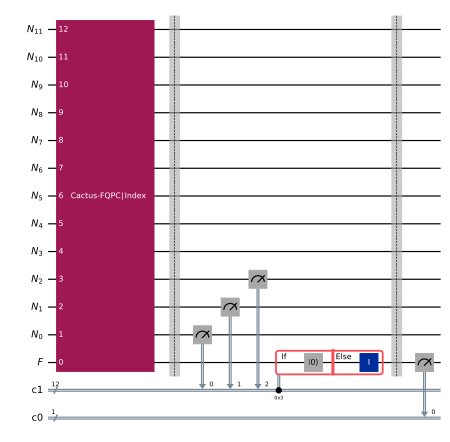

In [1]:
#直通滤波
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存
q_F = QuantumRegister(1, name='F')
q_N = QuantumRegister(12, name='N')



c_F = ClassicalRegister(1)
c_N = ClassicalRegister(12)


circuit = QuantumCircuit(q_F,q_N,c_F,c_N)# ,q_B,c_B
def create_mcx_subcircuit():
    sub_qr = QuantumRegister(13, name="sub_q")  # 23 控制位 + 1 目标位
    sub_circuit = QuantumCircuit(sub_qr, name="  Cactus-FQPC∣Index  ")

    return sub_circuit.to_gate()

# 添加封装好的门
mcx_gate = create_mcx_subcircuit()
circuit.append(mcx_gate,range(13))
circuit.barrier()
circuit.measure(q_N[0], c_N[0])
circuit.measure(q_N[1], c_N[1])
circuit.measure(q_N[2], c_N[2])
with circuit.if_test((c_N, 3))as else_:
    circuit.reset(q_F[0])  
with else_:
    circuit.id(q_F[0]) 
circuit.barrier()
circuit.measure(q_F,c_F)



#circuit.draw(output='mpl', reverse_bits=True, scale=0.8, fold=200).savefig(
#    "颜色交换.png", format="png", dpi=200, bbox_inches='tight'
#)
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)